In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,BatchNormalization,Dropout

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:07<00:00, 82.8MB/s]
100% 1.06G/1.06G [00:09<00:00, 126MB/s] 


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    )
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))

In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size = (3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

In [8]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(train_ds,epochs = 10,validation_data = test_ds)

Epoch 1/10
625/625 [==============================] - 97s 139ms/step - loss: 1.3453 - accuracy: 0.5922 - val_loss: 0.6304 - val_accuracy: 0.6652
Epoch 2/10
625/625 [==============================] - 88s 141ms/step - loss: 0.5957 - accuracy: 0.6921 - val_loss: 0.5690 - val_accuracy: 0.7060
Epoch 3/10
625/625 [==============================] - 98s 157ms/step - loss: 0.4968 - accuracy: 0.7612 - val_loss: 1.5686 - val_accuracy: 0.5805
Epoch 4/10
625/625 [==============================] - 98s 156ms/step - loss: 0.4361 - accuracy: 0.7982 - val_loss: 0.3954 - val_accuracy: 0.8259
Epoch 5/10
625/625 [==============================] - 98s 156ms/step - loss: 0.3708 - accuracy: 0.8352 - val_loss: 0.3060 - val_accuracy: 0.8692
Epoch 6/10
625/625 [==============================] - 98s 156ms/step - loss: 0.3009 - accuracy: 0.8688 - val_loss: 0.2199 - val_accuracy: 0.9117
Epoch 7/10
625/625 [==============================] - 87s 139ms/step - loss: 0.2313 - accuracy: 0.9054 - val_loss: 0.9885 - val_ac

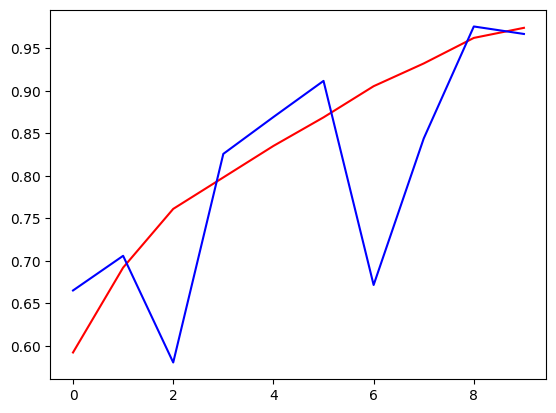

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color ='red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'test')
plt.show()

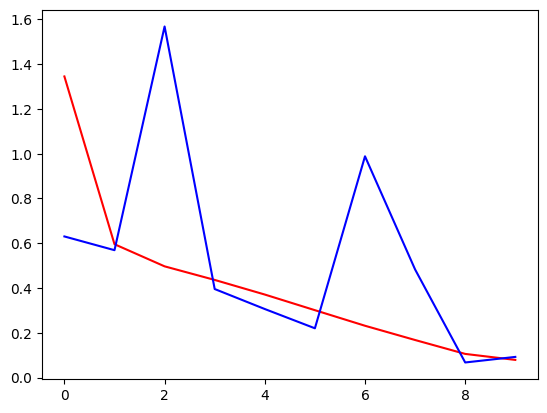

In [17]:
plt.plot(history.history['loss'],color = 'red',label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'test')
plt.show()

In [20]:
import cv2

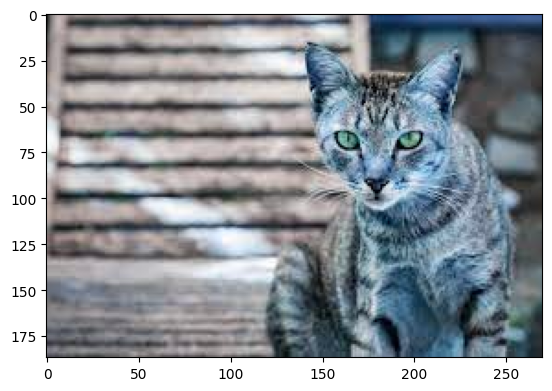

In [21]:
test_image = cv2.imread('/content/cat1.jpg')
plt.imshow(test_image)

In [22]:
test_image.shape

(187, 270, 3)

In [23]:
test_image = cv2.resize(test_image,(256,256))

In [24]:
test_input = test_image.reshape((1,256,256,3))

In [25]:
model.predict(test_input)

1/1 [==============================] - 0s 401ms/step


array([[0.]], dtype=float32)

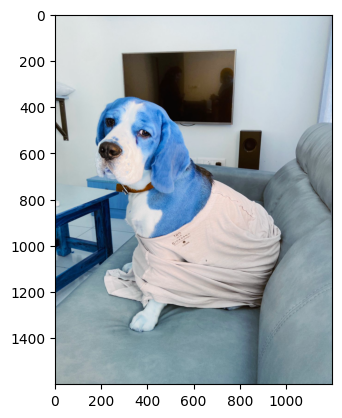

In [30]:
test_image = cv2.imread('/content/dog3.jpeg')
plt.imshow(test_image)

In [31]:
test_image = cv2.resize(test_image,(256,256))

In [32]:
test_input = test_image.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)